In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def moving_average(x, n: int = 100):
    ret = np.cumsum(x, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n-1:] / n

In [3]:
result_files = {
    'sasrec_2': [
        './experiments/movielens_dualdice_sasrec_2_27002',
        './experiments/movielens_dualdice_sasrec_2_18398',
        './experiments/movielens_dualdice_sasrec_2_35222',
        './experiments/movielens_dualdice_sasrec_2_10773',
        './experiments/movielens_dualdice_sasrec_2_26680'
    ],
    'sasrec_3': [
        './experiments/movielens_dualdice_sasrec_3_27002',
        './experiments/movielens_dualdice_sasrec_3_18398',
        './experiments/movielens_dualdice_sasrec_3_35222',
        './experiments/movielens_dualdice_sasrec_3_10773',
        './experiments/movielens_dualdice_sasrec_3_26680'
    ],
    'sasrec_4': [
        './experiments/movielens_dualdice_sasrec_4_27002',
        './experiments/movielens_dualdice_sasrec_4_18398',
        './experiments/movielens_dualdice_sasrec_4_35222',
        './experiments/movielens_dualdice_sasrec_4_10773',
        './experiments/movielens_dualdice_sasrec_4_26680'
    ],
    'dt4rec': [
        './experiments/movielens_dualdice_dt4rec_27002',
        './experiments/movielens_dualdice_dt4rec_18398',
        './experiments/movielens_dualdice_dt4rec_35222',
        './experiments/movielens_dualdice_dt4rec_10773',
        './experiments/movielens_dualdice_dt4rec_26680'
    ],
    'cql_sasrec': [
        './experiments/movielens_dualdice_cql_sasrec_27002',
        './experiments/movielens_dualdice_cql_sasrec_18398',
        './experiments/movielens_dualdice_cql_sasrec_35222',
        './experiments/movielens_dualdice_cql_sasrec_10773',
        './experiments/movielens_dualdice_cql_sasrec_26680'
    ],
    'ssknn': [
        './experiments/movielens_dualdice_ssknn_27002',
        './experiments/movielens_dualdice_ssknn_18398',
        './experiments/movielens_dualdice_ssknn_35222',
        './experiments/movielens_dualdice_ssknn_10773',
        './experiments/movielens_dualdice_ssknn_26680'
    ]
}

In [4]:
data = pd.DataFrame()

for key, dir_list in result_files.items():
    for dir in dir_list:
        values = np.load(f'{dir}/values.npy')
        values = moving_average(values)
        data_new = pd.DataFrame({
            'value' : values,
            'step' : np.arange(len(values))
        })
        data_new['policy'] = key
        data = pd.concat([data, data_new], ignore_index=True, axis=0)

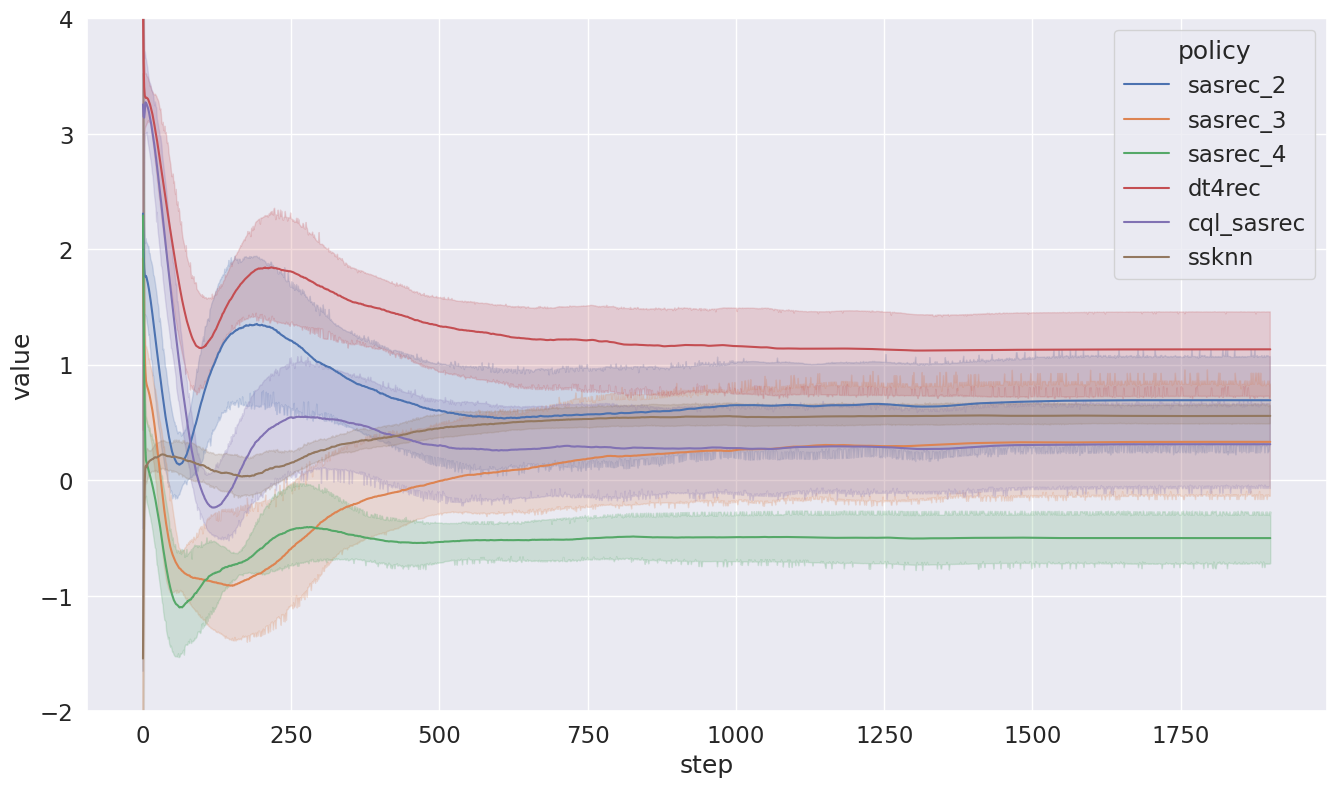

In [5]:
sns.set_theme(rc={'figure.figsize':(16, 9)}, font_scale=1.5)

sns.lineplot(data=data, x='step', y='value', hue='policy', errorbar='ci')
plt.ylim(-2, 4)
# plt.savefig("./images/dualdice_movielens.pdf", bbox_inches='tight')
plt.show()